In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=4819330964eda6edacc88afced5213e6089753d2618ae0aef35081ef96b65c8a
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
import pandas as pd
data = pd.read_csv('/content/market-basket.csv', error_bad_lines=False, sep=';')
data.head()

<ipython-input-24-0ba8bdad65ea>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/market-basket.csv', error_bad_lines=False, sep=';')
<ipython-input-24-0ba8bdad65ea>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/market-basket.csv', error_bad_lines=False, sep=';')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
df1 = data[['CustomerID','BillNo','Quantity']]
df1.head()

,CustomerID,BillNo,Quantity
0,17850.0,536365,6
1,17850.0,536365,6
2,17850.0,536365,8
3,17850.0,536365,6
4,17850.0,536365,6


In [ ]:
df=df1.groupby ('BillNo') ['Quantity']. apply (lambda x: x.reset_index (drop = True)). unstack (). reset_index ()
df.drop('BillNo',axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113
0,6.0,6.0,8.0,6.0,6.0,2.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32.0,6.0,6.0,8.0,6.0,6.0,3.0,2.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
items = (df[0].unique())
items

array([ 6.0000e+00,  3.2000e+01,  3.0000e+00,  2.4000e+01,  8.0000e+01,
        4.8000e+01,  1.0000e+01,  2.3000e+01,  1.2000e+01,  1.0000e+00,
        3.6000e+01,  1.9200e+02,  2.0000e+00,  8.0000e+00,  4.0000e+01,
        9.6000e+01,  1.2800e+02,  5.6000e+01,  4.0000e+00,  2.0000e+02,
        5.0000e+00,  1.6000e+01,  7.2000e+01,  5.0000e+01,  2.5000e+01,
        1.4400e+02,  6.0000e+01,  2.1600e+02,  1.2000e+02,  3.8400e+02,
       -1.0000e+01,  3.0000e+01, -3.8000e+01,  1.9000e+01,  1.8240e+03,
        2.0400e+02,  6.9000e+01,  1.6000e+02,  2.8800e+03,  2.0000e+01,
        2.8800e+02,  1.3000e+01,  1.5000e+01,  7.0000e+01,  1.0000e+02,
        9.0000e+00,  5.7000e+01, -2.0000e+01, -6.0000e+00,  1.1000e+02,
       -2.2000e+01, -2.0000e+00, -3.0000e+01, -7.0000e+01, -1.3000e+02,
       -8.0000e+01, -1.2000e+02, -4.0000e+01, -5.0000e+00, -1.2000e+01,
       -2.5000e+01, -1.4000e+01, -1.5000e+01, -6.9000e+01, -3.0000e+00,
       -1.4000e+02, -3.2000e+02,  1.8000e+01,  1.5600e+02,  3.10

In [ ]:
encoded_vals = []
def custom():
    for index, row in df.iterrows():
        labels = {}
        uncommons = list(set(items) - set(row))
        commons = list(set(items).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)
custom()
ohe_df = pd.DataFrame(encoded_vals)
print(ohe_df)

        1.0    3.0    4.0    5.0    7.0    9.0    10.0   11.0   12.0   13.0  \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      1      1      0      0      0      0      0      0      0   
3          0      1      0      0      0      0      0      0      0      0   
4          0      1      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
21660      0      1      1      0      0      0      0      0      1      0   
21661      1      1      1      0      0      0      0      0      1      0   
21662      1      0      0      0      0      0      0      0      0      0   
21663      1      0      0      0      0      0      0      0      0      0   
21664      1      0      0      0      0      0      0      0      0      0   

       ...  -11.0  -10.0  -5.0   -4.0   -3.0   -1.0

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
freq_items = apriori(ohe_df, min_support=0.006, use_colnames=True) #, verbose=1 #min_support=0.006, 
freq_items

,support,itemsets
0,0.389568,(1.0)
1,0.394415,(3.0)
2,0.486591,(4.0)
3,0.192246,(5.0)
4,0.063974,(7.0)
...,...,...
25980,0.006739,"(1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0,..."
25981,0.006647,"(1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,..."
25982,0.006647,"(1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,..."
25983,0.006647,"(2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,..."


In [ ]:
freq_items.to_excel('Export&Supportvalues.xlsx')

In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.006)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1.0),(3.0),0.389568,0.394415,0.257327,0.660545,1.674746,0.103676,1.783992
1,(3.0),(1.0),0.394415,0.389568,0.257327,0.652428,1.674746,0.103676,1.756275
2,(1.0),(4.0),0.389568,0.486591,0.262728,0.674408,1.385984,0.073167,1.576845
3,(4.0),(1.0),0.486591,0.389568,0.262728,0.539935,1.385984,0.073167,1.326839
4,(1.0),(5.0),0.389568,0.192246,0.149735,0.384360,1.999319,0.074842,1.312057
...,...,...,...,...,...,...,...,...,...
2572079,(8.0),"(1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0,...",0.287099,0.007247,0.006647,0.023151,3.194708,0.004566,1.016281
2572080,(9.0),"(1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0,...",0.059312,0.007893,0.006647,0.112062,14.197829,0.006179,1.117316
2572081,(10.0),"(1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",0.307870,0.007570,0.006647,0.021589,2.852013,0.004316,1.014329
2572082,(11.0),"(1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",0.027787,0.010155,0.006647,0.239203,23.556025,0.006365,1.301063


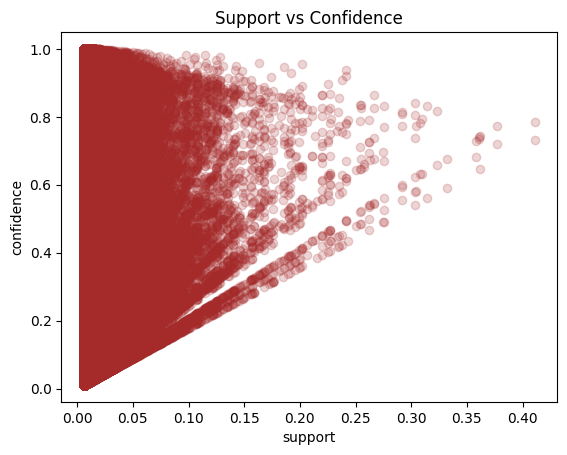

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.2,color='brown')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

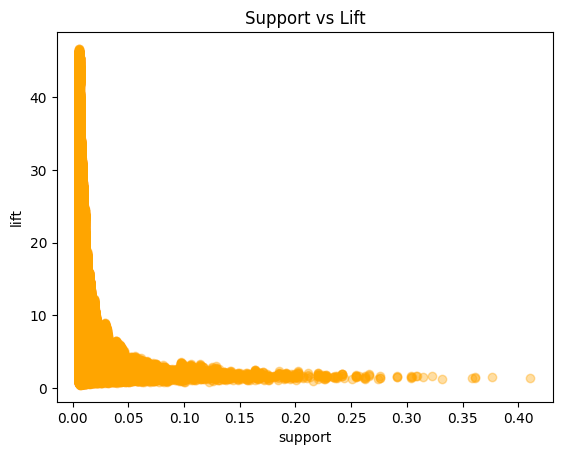

In [ ]:
plt.scatter(rules['support'], rules['lift'], alpha=0.2,color='orange')
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [ ]:
%%capture
!sudo apt-get update --fix-missing

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName('fpgrowth') \
    .getOrCreate()

spark

In [44]:
from google.colab import files
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas


sparkdata = spark.createDataFrame(df)
basketdata = sparkdata.dropDuplicates(['BillNo', 'Quantity']).sort('BillNo')
basketdata = basketdata.groupBy("BillNo").agg(F.collect_list("Quantity")).sort('BillNo')

AnalysisException: ignored